In [1]:
#Import code from last time
%run NI2-3.ipynb

         Current function value: 0.811590
         Iterations: 100
         Function evaluations: 118
         Gradient evaluations: 118


<Figure size 640x480 with 1 Axes>

         Current function value: 0.646439
         Iterations: 100
         Function evaluations: 114
         Gradient evaluations: 114


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [2]:
testX

array([[0.44281211, 0.6646853 ],
       [0.49627058, 0.38417609],
       [0.47546339, 0.50844449],
       [0.55155979, 0.70605062],
       [0.50099435, 0.62566313],
       [0.44545859, 0.31006745],
       [0.50571167, 0.71815185],
       [0.46588904, 0.58129533],
       [0.46785659, 0.59084039],
       [0.45300142, 0.64112187],
       [0.43741172, 0.70009636],
       [0.3506737 , 0.61497185],
       [0.36403131, 0.591378  ]])

In [3]:
testY

array([[0.38417609],
       [0.50844449],
       [0.70605062],
       [0.62566313],
       [0.31006745],
       [0.71815185],
       [0.58129533],
       [0.59084039],
       [0.64112187],
       [0.70009636],
       [0.61497185],
       [0.591378  ],
       [0.32      ]])

In [4]:
trainX

array([[0.051925  , 0.42336055],
       [0.14831904, 0.31155855],
       [0.11211342, 0.42299539],
       [0.17073406, 0.42478065],
       [0.2232566 , 0.32205711],
       [0.24197469, 0.46046559],
       [0.36573346, 0.16668864],
       [0.55255899, 0.40174469],
       [0.37002352, 0.31647817],
       [0.3325317 , 0.27086271],
       [0.38788752, 0.31251205],
       [0.39836394, 0.36909266],
       [0.2848263 , 0.20575138],
       [0.18673502, 0.17619313],
       [0.18269477, 0.29041944],
       [0.255617  , 0.24090886],
       [0.23597043, 0.27408835],
       [0.16413413, 0.37090835],
       [0.17817663, 0.05869047],
       [0.1639561 , 0.40032459],
       [0.13324148, 0.28999341],
       [0.22639902, 0.30771415],
       [0.25501386, 0.42915251],
       [0.23708614, 0.44062484],
       [0.23165112, 0.35804636],
       [0.23306761, 0.2957245 ],
       [0.22117372, 0.4914135 ],
       [0.22633168, 0.35624081],
       [0.21869864, 0.54105594],
       [0.2320322 , 0.15752904],
       [0.

In [5]:
trainY

array([[0.31155855],
       [0.42299539],
       [0.42478065],
       [0.32205711],
       [0.46046559],
       [0.16668864],
       [0.40174469],
       [0.31647817],
       [0.27086271],
       [0.31251205],
       [0.36909266],
       [0.20575138],
       [0.17619313],
       [0.29041944],
       [0.24090886],
       [0.27408835],
       [0.37090835],
       [0.05869047],
       [0.40032459],
       [0.28999341],
       [0.30771415],
       [0.42915251],
       [0.44062484],
       [0.35804636],
       [0.2957245 ],
       [0.4914135 ],
       [0.35624081],
       [0.54105594],
       [0.15752904],
       [0.55294416],
       [0.51433788],
       [0.44121317],
       [0.58940001],
       [0.67707055],
       [0.67615763],
       [0.69694172],
       [0.58293858],
       [0.61114774],
       [0.7834559 ],
       [0.93566973],
       [0.28699092],
       [1.        ],
       [0.84997718],
       [0.62600801],
       [0.93614647],
       [0.85846731],
       [0.70258153],
       [0.664

In [6]:
#Regularization Parameter:
Lambda = 0.0001

In [7]:
#Need to make changes to costFunction and costFunctionPrim:
def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    self.yHat = self.forward(X)
    #We don't want cost to increase with the number of examples, so normalize by dividing the error term by number of examples(X.shape[0])
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [8]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0.0001):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    def predict(self):
        prediksi = self.forward(dataprediksi)
        return prediksi
    
    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [9]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4

    for p in range(len(paramsInitial)):
        #Set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X, y)
            
        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X, y)

        #Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
        perturb[p] = 0
            
    #Return Params to original value:
    N.setParams(paramsInitial)

    return numgrad 

In [10]:
NN = Neural_Network(Lambda=0.0001)

In [11]:
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [12]:
#Should be less than 1e-8:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

7.481185517193671e-10

In [13]:
T = trainer(NN)

In [14]:
T.train(X,y,testX,testY)

Optimization terminated successfully.
         Current function value: 0.015180
         Iterations: 88
         Function evaluations: 96
         Gradient evaluations: 96


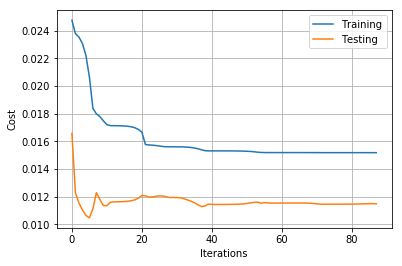

In [15]:
plot.plot(T.J)
plot.plot(T.testJ)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.legend(['Training', 'Testing'])
plot.show()

In [16]:
T.J

[array([0.02475818]),
 array([0.02379112]),
 array([0.02354292]),
 array([0.02308008]),
 array([0.02221286]),
 array([0.02064758]),
 array([0.01838372]),
 array([0.01798448]),
 array([0.01778791]),
 array([0.01747883]),
 array([0.01720392]),
 array([0.017138]),
 array([0.01713188]),
 array([0.01712801]),
 array([0.01712144]),
 array([0.01710967]),
 array([0.01708815]),
 array([0.01704896]),
 array([0.01697939]),
 array([0.01686147]),
 array([0.01666578]),
 array([0.01577531]),
 array([0.01573674]),
 array([0.01572179]),
 array([0.01569715]),
 array([0.01566022]),
 array([0.01562614]),
 array([0.01560633]),
 array([0.01560326]),
 array([0.01560293]),
 array([0.01560231]),
 array([0.01560112]),
 array([0.01559195]),
 array([0.01557872]),
 array([0.01555661]),
 array([0.01551987]),
 array([0.0154632]),
 array([0.01539043]),
 array([0.0153244]),
 array([0.01530943]),
 array([0.0153088]),
 array([0.01530852]),
 array([0.01530841]),
 array([0.0153082]),
 array([0.01530781]),
 array([0.015307

In [17]:
T.testJ

[array([0.01656804]),
 array([0.01227985]),
 array([0.01154059]),
 array([0.01104459]),
 array([0.01064725]),
 array([0.01046011]),
 array([0.01113373]),
 array([0.01228435]),
 array([0.01179295]),
 array([0.01134685]),
 array([0.01134664]),
 array([0.01159069]),
 array([0.0116197]),
 array([0.01162416]),
 array([0.01163242]),
 array([0.01164553]),
 array([0.01166648]),
 array([0.01170226]),
 array([0.01176757]),
 array([0.0118902]),
 array([0.01208389]),
 array([0.01205283]),
 array([0.01196864]),
 array([0.01198379]),
 array([0.01202052]),
 array([0.01205712]),
 array([0.01204668]),
 array([0.0119873]),
 array([0.0119343]),
 array([0.01194024]),
 array([0.01193056]),
 array([0.01191966]),
 array([0.0118469]),
 array([0.01176373]),
 array([0.01167203]),
 array([0.01155931]),
 array([0.0114143]),
 array([0.01128398]),
 array([0.0113222]),
 array([0.01145618]),
 array([0.01144182]),
 array([0.0114306]),
 array([0.01143137]),
 array([0.01143264]),
 array([0.0114345]),
 array([0.01143714]

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(T.J, T.testJ)

0.004545375063956501

In [19]:
yHat=NN.forward(X)

In [20]:
yHat

array([[0.31576562],
       [0.342304  ],
       [0.34949506],
       [0.38354445],
       [0.387774  ],
       [0.43348238],
       [0.43005345],
       [0.58117167],
       [0.46963538],
       [0.4373578 ],
       [0.47847794],
       [0.49772426],
       [0.39371013],
       [0.3304908 ],
       [0.35655737],
       [0.38584076],
       [0.38294909],
       [0.36615494],
       [0.29744321],
       [0.37346586],
       [0.32849871],
       [0.3859522 ],
       [0.43304347],
       [0.42569858],
       [0.40171016],
       [0.38675174],
       [0.42939584],
       [0.3981945 ],
       [0.44045392],
       [0.35140191],
       [0.45093073],
       [0.43537384],
       [0.4546944 ],
       [0.49112777],
       [0.51650394],
       [0.48767398],
       [0.52642359],
       [0.52670133],
       [0.53994606],
       [0.61128267],
       [0.6358193 ],
       [0.55988735],
       [0.69854103],
       [0.70549654],
       [0.70299453],
       [0.70203158],
       [0.67309606],
       [0.609

In [21]:
y

array([[0.31155855],
       [0.42299539],
       [0.42478065],
       [0.32205711],
       [0.46046559],
       [0.16668864],
       [0.40174469],
       [0.31647817],
       [0.27086271],
       [0.31251205],
       [0.36909266],
       [0.20575138],
       [0.17619313],
       [0.29041944],
       [0.24090886],
       [0.27408835],
       [0.37090835],
       [0.05869047],
       [0.40032459],
       [0.28999341],
       [0.30771415],
       [0.42915251],
       [0.44062484],
       [0.35804636],
       [0.2957245 ],
       [0.4914135 ],
       [0.35624081],
       [0.54105594],
       [0.15752904],
       [0.55294416],
       [0.51433788],
       [0.44121317],
       [0.58940001],
       [0.67707055],
       [0.67615763],
       [0.69694172],
       [0.58293858],
       [0.61114774],
       [0.7834559 ],
       [0.93566973],
       [0.28699092],
       [1.        ],
       [0.84997718],
       [0.62600801],
       [0.93614647],
       [0.85846731],
       [0.70258153],
       [0.664

In [22]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y,yHat) 

0.027298390318305745

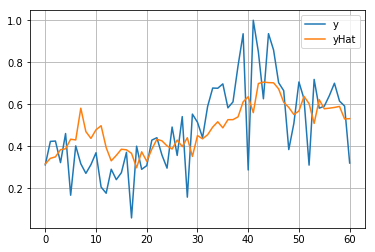

In [23]:
#Plot cost during training:
plot.plot(y)
plot.plot(yHat)
plot.grid(1)
plot.legend(['y', 'yHat'])
plot.show()

In [24]:
prediksi=NN.forward(dataprediksi)

In [25]:
prediksi

array([[0.66168925],
       [0.73868483],
       [0.64650772],
       [0.45915431]])

In [26]:
from sklearn.metrics import mean_squared_error 

In [27]:
Y_true= ([	0.50	]	,
[	0.415539889	]	,
[	0	]	,
[	0.235502358	]	,

)


Y_pred=prediksi
mean_squared_error(Y_true,Y_pred) 

0.14963962387569138

In [28]:
dataprediksi

array([[0.79538041, 0.32      ],
       [1.        , 0.5       ],
       [0.70768171, 0.41553989],
       [0.49169532, 0.        ]])

In [29]:
z=np.array([0.51319034])

In [30]:
y=np.array([	0.235502358	])

In [31]:
a=np.concatenate((z,y))

In [32]:
#prediksi 1
prediksi=NN.forward(a)
prediksi

array([0.52648708])

In [33]:
#prediksi 2
c=prediksi
z1=np.array([0.48673204])
b=y[1:]
d=np.concatenate((z1,b,c))
prediksi=NN.forward(d)
prediksi

array([0.57674676])

In [34]:
#prediksi 3
c=prediksi
z2=np.array([0.43012934])
b=y[1:]
d=np.concatenate((z2,b,c))
prediksi=NN.forward(d)
prediksi

array([0.56079133])

In [35]:
#prediksi 4
c=prediksi
z3=np.array([0.41357631])
b=y[1:]
d=np.concatenate((z3,b,c))
prediksi=NN.forward(d)
prediksi

array([0.54933332])

In [36]:
#prediksi 5
c=prediksi
z4=np.array([0.41626853])
b=y[1:]
d=np.concatenate((z4,b,c))
prediksi=NN.forward(d)
prediksi

array([0.54814558])

In [37]:
#prediksi 6
c=prediksi
z5=np.array([0.41314695])
b=y[1:]
d=np.concatenate((z5,b,c))
prediksi=NN.forward(d)
prediksi

array([0.54634894])